# 10 菜品摆放-数据可视化
字不如表，表不如图，借助图形来清晰有效表达信息的方式叫可视化，可视化可以帮助我们更好地传递信息

In [2]:
import pandas as pd
import numpy as np

# 导入matplotlib库中的额pyplot
import matplotlib.pyplot as plt
# 让图表直接在Jupyter notebook中展示出来
%matplotlib inline
# 解决中文乱码问题
plt.rcParams['font.sans-serif'] = ['SimHei']
# 解决负号无法正常显示的问题
plt.rcParams['axes.unicode_minus'] = False
# 默认设置下matplotlib做出来的图标不是很清晰，可以将图表设置成矢量格式显示
%config InlineBackend.figure_format = 'svg'

# 一个cell输出多行语句
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"

## 一、数据可视化的基本流程
* **整理数据**<br>
    明确把那些数据可视化
* **明确目的**<br>
    要明确表达什么，传递给看图人那些信息
* **寻找合适的表现形式**<br>
    选择折线图还是饼图等
    
## 二、图标的基本组成元素

<img src='./image/chart.jpg' width='60%' />

* **画布**<br>
    首先需要找到一块“布”，即绘图界面，然后在该“布”上绘制图表。画布是图表最大的概念
* **坐标系**<br>
    画布是图表最大的概念，可以在画布上建立多个坐标系，分为直角坐标系，球坐标系和极坐标系。直角坐标系最为常见
* **坐标轴**<br>
    坐标轴是坐标系中的概念，主要有x轴，y轴（二维），一组x/y值唯一确定坐标系中的点<br>
    x轴也称为横轴，即上图中的月份；y轴也称为纵轴，即上图中的注册人数
* **坐标轴标题**<br>
    x轴和y轴的坐标名称，即上图中的月份和注册人数
* **图表标题**<br>
    整个图标的核心标题
* **数据标签**<br>
    数据标签用于展示图表中的数值，即每个点对应展示的数值
* **数据表**<br>
    数据表在图下方，以表格形式展示出来
* **网格线**<br>
    网格线是坐标轴的延伸，可以清楚的看到每个点在大概什么位置，值是多少
* **图例**<br>
    不同符号或颜色代表不同的内容与指标
* **误差线**<br>
    误差线主要用来表示坐标轴上每个点的不确定程度，一般用标准差表示，即一个点的误差为该点的实际加减标准差

## 三、建立画布和坐标系
### 3.1 建立画布

In [3]:
fig = plt.figure()
# figsize：用宽高
plt.figure(figsize=(8,6))
# 建立画布以后并不会直接显示出来，只能输出一串画布相关信息的代码

<Figure size 576x432 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 576x432 with 0 Axes>

### 3.2 用add_subplot函数建立坐标系
前提：先有画布

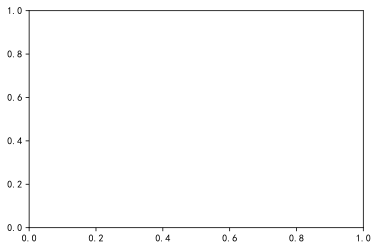

In [4]:
fig = plt.figure()
# 在画布上建立1*1个坐标系
ax1 = fig.add_subplot(1, 1, 1)

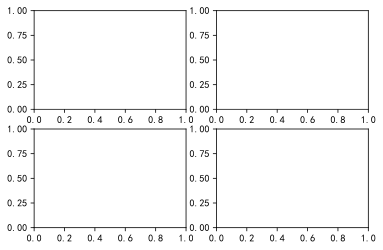

In [5]:
# 在画布上建立2*2个坐标系，即4个坐标系
fig = plt.figure()
ax1 = fig.add_subplot(2, 2, 1)
ax2 = fig.add_subplot(2, 2, 2)
ax3 = fig.add_subplot(2, 2, 3)
ax4 = fig.add_subplot(2, 2, 4)

### 3.3 用plt.subplot2grid函数建立坐标系
不需要先建立画布

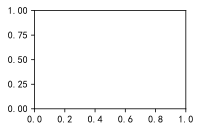

In [6]:
# 在整个区域分成2行2列，且在(0,0)位置绘图
plt.subplot2grid((2, 2), (0, 0))

<BarContainer object of 6 artists>

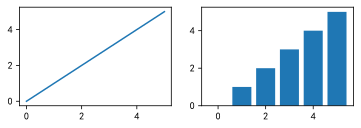

In [7]:
# 用这种方式建立坐标系，绘图代码要跟在坐标系语句后面
# 如：绘制2行2列，在（0，0）位置做折线图，在（0，1）位置做柱形图
x = np.arange(6)
y = np.arange(6)
plt.subplot2grid((2, 2), (0, 0))
plt.plot(x, y)

plt.subplot2grid((2, 2), (0, 1))
plt.bar(x, y)

### 3.4 用plt.subplot函数建立坐标系
与plt.subplot2grid函数类似

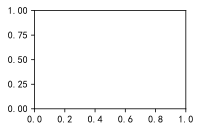

In [8]:
plt.subplot(2, 2, 1)

<BarContainer object of 6 artists>

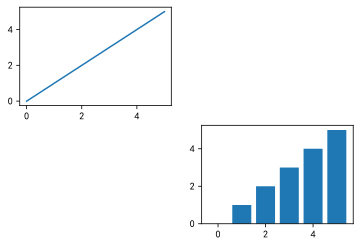

In [9]:
# 将整个区域分为2行2列，在第1个坐标系上画折线图，在第4个坐标系上做柱状图
x = np.arange(6)
y = np.arange(6)

plt.subplot(2, 2, 1)
plt.plot(x, y)
plt.subplot(2, 2, 4)
plt.bar(x, y)

### 3.5 用plt.subplots函数建立坐标系
subplots和subplot、subplot2grid函数不同之处是：它们每次只返回一个坐标系，而subplots一次可以返回多个坐标系

<BarContainer object of 6 artists>

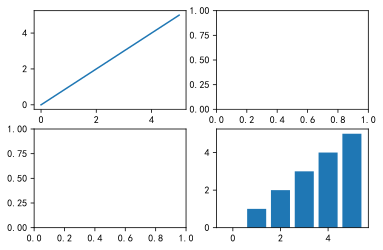

In [10]:
# 整个区域分成2行2列，并将4个坐标系全部返回
fig, axes = plt.subplots(2, 2)

# 通过axes[x, y]指明在哪个坐标系绘制
x = np.arange(6)
y = np.arange(6)

axes[0, 0].plot(x, y)
axes[1, 1].bar(x, y)

### 3.6 几种创建坐标系方法的区别
* 第一种方法add_subplot属于对象式编程，所有操作都是针对某个对象进行的，建立画布-》在画布上建立坐标系-》在坐标系上绘图
* 后面三种属于函数式编程，比较简洁精炼，直接调用plt中某个函数就直接达到创建坐标系的目的

对象式编程的代码比较反锁，但是便于理解；函数式编程虽然代码简洁，但是不利于新人掌握整体的绘图原理

建议刚开始学对象式编程，便于理解，后面熟悉了在使用函数式编程

函数式编程不仅体现在创建坐标系中。后面可能还有和对象式编程交叉使用

## 四、设置坐标轴
### 4.1 设置坐标轴的标题

Text(0.5, 0, '月份')

Text(0, 0.5, '销量')

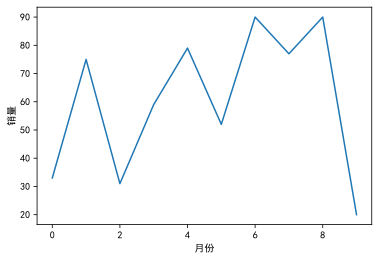

In [11]:
plt.subplot(1, 1, 1)

x = np.arange(10)
y = np.random.randint(10, 100, 10)

plt.plot(x, y)
plt.xlabel('月份')
plt.ylabel('销量')

# fig, ax = plt.subplots(2, 2)
# ax[0, 0].plot([1, 2, 3, 4], [1, 4, 2, 3])

Text(0.5, 0, '月份')

Text(0, 0.5, '销量')

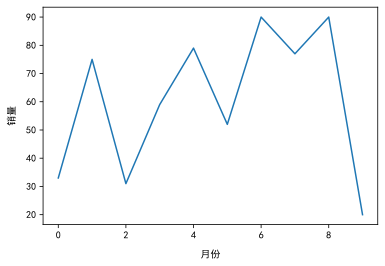

In [12]:
# 设置xlabel、ylabel到x轴和y轴的距离，参数labelpad
plt.plot(x, y)
plt.xlabel('月份', labelpad=10)
plt.ylabel('销量', labelpad=10)

Text(0.5, 0, '月份')

Text(0, 0.5, '销量')

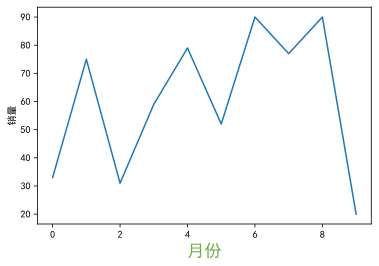

In [13]:
# 设置xlabel、ylabel文本相关性质，如：字体大小、字体颜色、是否加粗等
plt.plot(x, y)
plt.xlabel('月份', fontsize='xx-large', color='#70AD47', fontweight='bold')
plt.ylabel('销量')

### 4.2 设置坐标轴的刻度
plt.xticks(ticks, labels)

plt.yticks(ticks, labels)

* ticks：刻度值
* labels：该刻度对应的标签
* 相关性质和xlabel、ylabel设置一致

Text(0.5, 0, '月份')

Text(0, 0.5, '注册人数')

([<matplotlib.axis.XTick at 0x11ddc07d0>,
 <a list of 10 Text xticklabel objects>)

([<matplotlib.axis.YTick at 0x11ddc4510>,
 <a list of 9 Text yticklabel objects>)

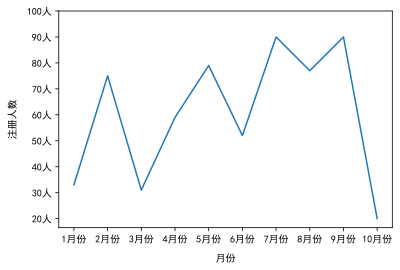

In [14]:
plt.plot(x, y)
plt.xlabel('月份', labelpad=10)
plt.ylabel('注册人数', labelpad=10)
plt.xticks(np.arange(10), ['1月份', '2月份', '3月份', '4月份', '5月份', '6月份', '7月份', '8月份', '9月份', '10月份'])
plt.yticks(np.arange(20, 110, 10), ['20人', '30人', '40人', '50人', '60人', '70人', '80人', '90人', '100人', '110人'])

Text(0.5, 0, '月份')

Text(0, 0.5, '注册人数')

([], <a list of 0 Text xticklabel objects>)

([], <a list of 0 Text yticklabel objects>)

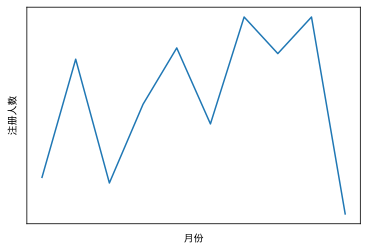

In [15]:
# 隐藏坐标轴刻度
plt.plot(x, y)
plt.xlabel('月份', labelpad=10)
plt.ylabel('注册人数', labelpad=10)
plt.xticks([])
plt.yticks([])

#### plt库中的tick_params函数对轴刻度线进行设置

```
plt.tick_prams(axis, reset, which, direction, length, width, color, 
               pad, labelsize, labelcolor, bottom, top, left, right, 
               labelbottom, labeltop, labelleft, labelright)
```

<img src='./image/plt_tick_params.jpg' width='65%' />

Text(0.5, 0, '月份')

Text(0, 0.5, '注册人数')

Text(0.5, 0, '月份')

Text(0, 0.5, '注册人数')

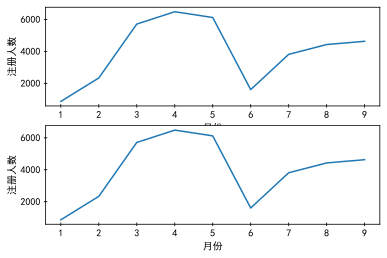

In [16]:
# 例：在2*1坐标系中，第一个坐标系中绘图，轴刻度线绘制成双向且下轴刻度线不显示
# 同时在第2个坐标系中绘图，轴刻度线成双向且下轴刻度标签不显示
# x = np.array([1, 2, 3, 4, 5, 6, 7, 8, 9])
# [start, end)
# step = 1
x = np.arange(1, 10, 1)
y = np.array([866, 2335, 5710, 6482, 6120, 1605, 3813, 4428, 4631])

plt.subplot(2, 1, 1)
plt.plot(x, y)
plt.xlabel('月份')
plt.ylabel('注册人数')

# 下轴刻度线不显示
plt.tick_params(axis = 'both', which='both', direction='inout', bottom='false')

# 下轴刻度标签不显示
plt.subplot(2, 1, 2)
plt.plot(x, y)
plt.xlabel('月份')
plt.ylabel('注册人数')
plt.tick_params(axis = 'both', which='both', direction='inout', labelbottom='false')

### 4.3 设置坐标轴的范围
设置坐标轴的最大值和最小值

Text(0.5, 0, '月份')

Text(0, 0.5, '注册人数')

(0, 10)

(0, 8000)

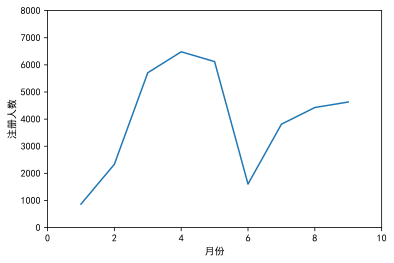

In [17]:
plt.plot(x, y)
plt.xlabel('月份')
plt.ylabel('注册人数')
plt.xlim(0, 10)
plt.ylim(0, 8000)

### 4.4 坐标轴的轴显示设置

Text(0.5, 0, '月份')

Text(0, 0.5, '注册人数')

(0.6, 9.4, 585.2, 6762.8)

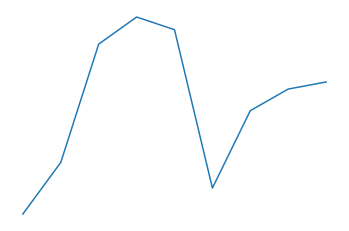

In [18]:
plt.plot(x, y)
plt.xlabel('月份')
plt.ylabel('注册人数')
# 关闭轴显示
plt.axis('off')

## 五、其他图表格式设置
### 5.1 网格线设置
网格线是相比于坐标轴更小的单位，默认是关闭的，通过修改b='True'来显示

Text(0.5, 0, '月份')

Text(0, 0.5, '注册人数')

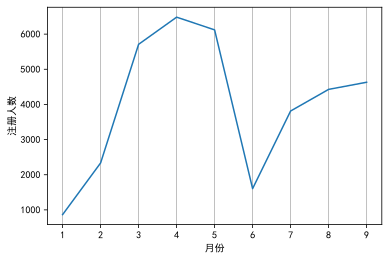

In [19]:
plt.plot(x, y)
plt.xlabel('月份')
plt.ylabel('注册人数')
# 显示网格线
# plt.grid(b='True')
# axis控制哪个轴网格线显示
plt.grid(b='True', axis='x')

Text(0.5, 0, '月份')

Text(0, 0.5, '注册人数')

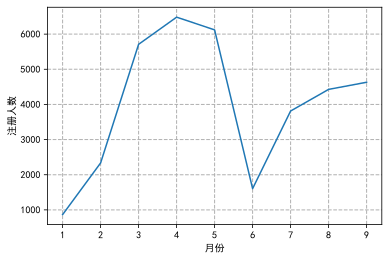

In [20]:
# 设置网格线样式，如线宽、线型、线的颜色
plt.plot(x, y)
plt.xlabel('月份')
plt.ylabel('注册人数')
# 虚线、线宽为1
plt.grid(b='True', linestyle='dashed', linewidth=1)

### 5.2 设置图例

<BarContainer object of 9 artists>

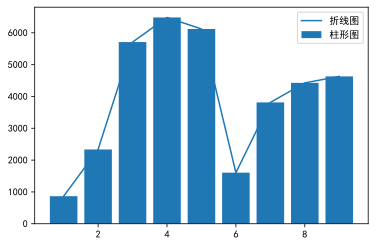

In [21]:
plt.plot(x, y, label='折线图')
plt.bar(x, y, label='柱形图')
plt.legend()

#### 5.2.1 loc参数调整图例位置
loc参数，可以传入loc字符串，也可以传入位置代码

<img src='./image/legend_loc.jpg' width='65%' />

<BarContainer object of 9 artists>

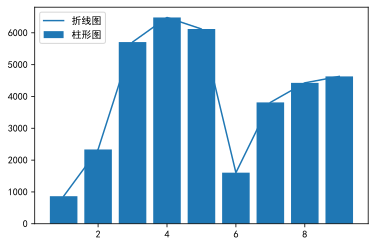

In [22]:
plt.plot(x, y, label='折线图')
plt.bar(x, y, label='柱形图')
plt.legend(loc='upper left')
plt.legend(loc=2)

#### 5.2.2 图例默认显示1列，参数ncol设置显示列数

<BarContainer object of 9 artists>

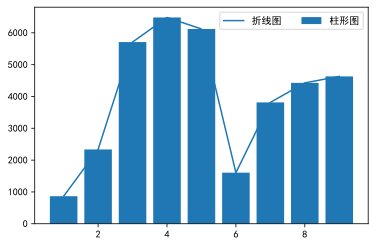

In [23]:
# 图例默认显示1列，参数ncol设置显示列数
plt.plot(x, y, label='折线图')
plt.bar(x, y, label='柱形图')
plt.legend(ncol = 2)

#### 5.2.3 其他参数
<img src='./image/legend_other.jpg' width='65%' />

## 5.3 图表标题设置

Text(0.5, 1.0, '1-9月xxx公司注册用户人数')

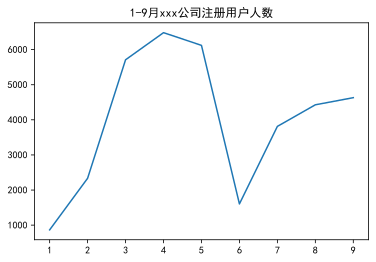

In [24]:
plt.plot(x, y)
plt.title(label='1-9月xxx公司注册用户人数')

#### 5.3.1 loc参数修改标题显示位置
默认居中显示

* center：居中显示
* left：靠左
* right：靠右

Text(1.0, 1.0, '1-9月xxx公司注册用户人数')

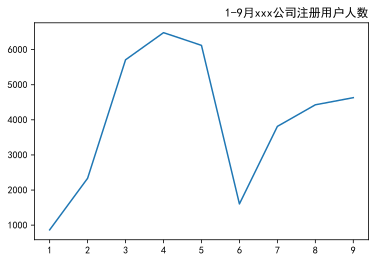

In [25]:
plt.plot(x, y)
plt.title(label='1-9月xxx公司注册用户人数', loc='right')

#### 5.3.2 fontdict参数修改标题相关性性质

### 5.4 设置数据标签
坐标值对应位置显示相应的数值，可以利用text函数实现

plt.text(x, y, str, ha, va, fontsize)

text函数参数说明：

<img src='./image/plt_text.jpg' width='80%' />

Text(0.5, 1.0, '1-9月xxx公司注册用户人数')

Text(5, 1605, '极值点')

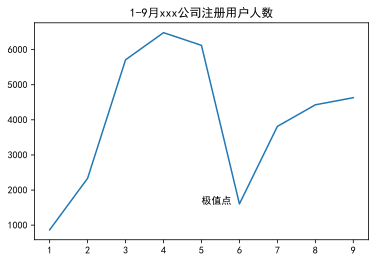

In [26]:
plt.plot(x, y)
plt.title(label='1-9月xxx公司注册用户人数')
plt.text(5, 1605, '极值点')

Text(0.5, 1.0, '1-9月xxx公司注册用户人数')

Text(1, 866, '866')

Text(2, 2335, '2335')

Text(3, 5710, '5710')

Text(4, 6482, '6482')

Text(5, 6120, '6120')

Text(6, 1605, '1605')

Text(7, 3813, '3813')

Text(8, 4428, '4428')

Text(9, 4631, '4631')

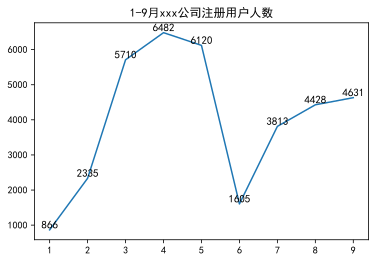

In [27]:
plt.plot(x, y)
plt.title(label='1-9月xxx公司注册用户人数')
# 所有点显示数据标签，需要利用for循环
for a, b in zip(x, y):
    plt.text(a, b, b, ha='center', va='bottom', fontsize=11)

### 5.5 图表注释

plt.annotate(s, xy, xytext, arrowprops)

<img src='./image/plt_annotate.jpg' width='80%' />

Text(0.5, 1.0, '1-9月xxx公司注册用户人数')

Text(7, 1605, '服务器宕机了')

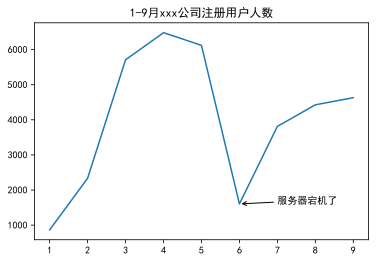

In [28]:
plt.plot(x, y)
plt.title(label='1-9月xxx公司注册用户人数')
# facecolor: 箭的颜色
# arrowstyle：箭的类型
# '-' '->' '-[' '<-' '<->' '<' 'fancy' 'simple' 'wedge'
plt.annotate('服务器宕机了', xy=(6, 1605), xytext=(7, 1605), 
             arrowprops=dict(facecolor='black', arrowstyle='->'))

### 5.6 数据表
数据表在图表基础上再添加一个表格

plt.table(cellText=None, cellColours=None, cellLoc='right',

    colWidths=None, rowLabels=None, rowColours=None, rowLoc='left',
    
    colLabels=None, colColours=None, colLoc='center', loc='bottom')

<img src='./image/plt_table.jpg' width='80%' />
<img src='./image/plt_table2.jpg' width='80%' />

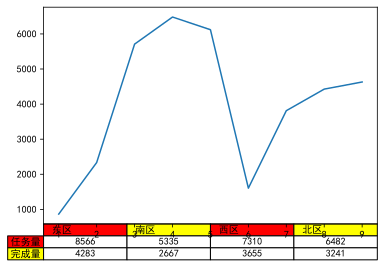

In [29]:
plt.plot(x, y)
cellText = [[8566, 5335, 7310, 6482], [4283, 2667, 3655, 3241]]
rows = ['任务量', '完成量']
columns = ['东区', '南区', '西区', '北区']
plt.table(cellText=cellText,
         cellLoc='center',
         rowLabels=rows,
         rowColours=['red', 'yellow'],
         rowLoc='center',
         colLabels=columns,
         colColours=['red', 'yellow', 'red', 'yellow'],
         colLoc='left',
         loc='bottom')

## 六、绘制常用图表
### 6.1 绘制折线图
折线图：随时间推移某指标的变化趋势

plt.plot(x, y, color, linestyle, linewidth, marker, 

    markeredgecolor, markeredgwidth, markerfacecolor, marksize, label)

* x，y：x轴和y轴的数据，必选项，其他参数都是可选项
* color：折线图的颜色

<img src='./image/plt_plot_color.jpg' width='60%' />

颜色不同使用方式

<img src='./image/plt_plot_color2.jpg' width='60%' />

linestyle：线的风格

<img src='./image/plt_plot_linestyle.jpg' width='60%' />

linewidth：线的宽度，浮点数

marker：每点标记物的形状

<img src='./image/plt_plot_marker.jpg' width='60%' />

marker相关参数说明：

<img src='./image/plt_plot_marker2.jpg' width='60%' />

Text(0.5, 1.0, 'XXX公司1-9月注册用户量')

Text(1, 866, '866')

Text(2, 2335, '2335')

Text(3, 5710, '5710')

Text(4, 6482, '6482')

Text(5, 6120, '6120')

Text(6, 1605, '1605')

Text(7, 3813, '3813')

Text(8, 4428, '4428')

Text(9, 4631, '4631')

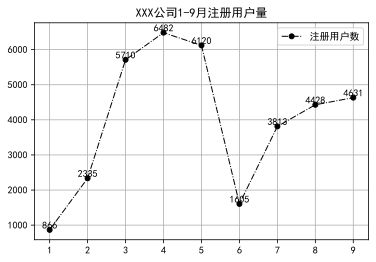

In [30]:
# xxx公司1-9月注册用户量
# 建立一个坐标系
plt.subplot(1, 1, 1)

x = np.arange(1, 10)
y = np.array([866, 2335, 5710, 6482, 6120, 1605, 3813, 4428, 4631])

# 绘图
plt.plot(x, y, color='k', linestyle='dashdot', linewidth=1, marker='o', markersize=5, label='注册用户数')

# 设置标题，标题名和标题位置
plt.title('XXX公司1-9月注册用户量', loc='center')

# 添加数据标签
for a, b in zip(x, y):
    plt.text(a, b, b, ha='center', va='bottom', fontsize=10)
    
# 设置网格线
plt.grid(True)

# 设置图例
plt.legend()

# 保存图表到本地
# plt.savefig('./image/plt_plot_save.jpg')

### 6.2 绘制柱形图
柱形图：比较不同类别之间的数据情况

plt.bar(x, height, width=0.8, bottom=None, align='center', color, edgecolor)

<img src='./image/plt_bar.jpg' width='60%' />

#### 6.2.1 普通柱形图

<BarContainer object of 4 artists>

Text(0.5, 1.0, '全国各分区任务量')

Text(东区, 8566, '8566')

Text(北区, 6482, '6482')

Text(南区, 5335, '5335')

Text(西区, 7310, '7310')

Text(0.5, 0, '分区')

Text(0, 0.5, '任务量')

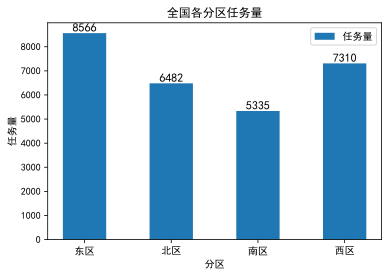

In [31]:
# 全国各分区任务量
plt.subplot(1, 1, 1)
x = np.array(['东区', '北区', '南区', '西区'])
y = np.array([8566, 6482, 5335, 7310])

plt.bar(x, y, width=0.5, align='center', label='任务量')

plt.title('全国各分区任务量', loc='center')

# 添加数据标签
for a, b in zip(x, y):
    plt.text(a, b, b, ha='center', va='bottom', fontsize=12)
    
plt.xlabel('分区')
plt.ylabel('任务量')

plt.legend()

# plt.savefig('./image/plt_bar_save.jpg')

#### 6.2.2 簇状柱形图
不同类别随着同一变量的变化情况

<BarContainer object of 4 artists>

<BarContainer object of 4 artists>

Text(0.5, 1.0, '全国各分区任务量和完成量')

Text(1, 8566, '8566')

Text(2, 6482, '6482')

Text(3, 7310, '7310')

Text(4, 6482, '6482')

Text(1.3, 4283, '4283')

Text(2.3, 2667, '2667')

Text(3.3, 3655, '3655')

Text(4.3, 3241, '3241')

Text(0.5, 0, '区域')

Text(0, 0.5, '任务情况')

([<matplotlib.axis.XTick at 0x11ede3190>,
 <a list of 4 Text xticklabel objects>)

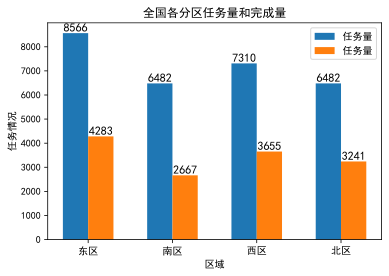

In [32]:
# 全国各分区任务量和完成量的簇状柱形图
# 全国各分区任务量
plt.subplot(1, 1, 1)
x = np.array([1, 2, 3, 4])
y1 = np.array([8566, 6482, 7310, 6482])
y2 = np.array([4283, 2667, 3655, 3241])

# 柱形图的宽度为0.3
plt.bar(x, y1, width=0.3, label='任务量')
# x+0.3 相当于把完成量的每个柱子右移0.3
plt.bar(x+0.3, y2, width=0.3, align='center', label='任务量')

plt.title('全国各分区任务量和完成量', loc='center')

# 添加数据标签
for a, b in zip(x, y1):
    plt.text(a, b, b, ha='center', va='bottom', fontsize=12)
for a, b in zip(x+0.3, y2):
    plt.text(a, b, b, ha='center', va='bottom', fontsize=12)
    
plt.xlabel('区域')
plt.ylabel('任务情况')

# 设置x轴刻度值
plt.xticks(x+0.15, ['东区', '南区', '西区', '北区'])

plt.grid(False)

plt.legend()

# plt.savefig('./image/plt_bar_save2.jpg')

#### 6.2.3 堆积柱形图
堆积柱形图常用来比较同类别各变量和不同类别变量的总和差异，在x位置绘制不同的y，就会自动增加

<BarContainer object of 4 artists>

<BarContainer object of 4 artists>

Text(0.5, 1.0, '全国各分区任务量和完成量')

Text(1, 8566, '8566')

Text(2, 6482, '6482')

Text(3, 7310, '7310')

Text(4, 6482, '6482')

Text(1, 4283, '4283')

Text(2, 2667, '2667')

Text(3, 3655, '3655')

Text(4, 3241, '3241')

Text(0.5, 0, '区域')

Text(0, 0.5, '任务情况')

([<matplotlib.axis.XTick at 0x11efeb390>,
 <a list of 4 Text xticklabel objects>)

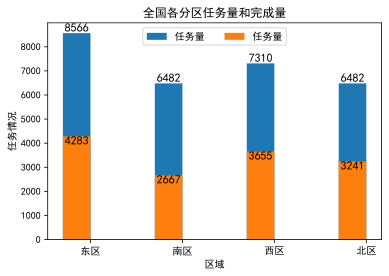

In [33]:
# 全国各分区任务量和完成量的堆积柱形图
plt.subplot(1, 1, 1)
x = np.array([1, 2, 3, 4])
y1 = np.array([8566, 6482, 7310, 6482])
y2 = np.array([4283, 2667, 3655, 3241])

# 柱形图的宽度为0.3
plt.bar(x, y1, width=0.3, label='任务量')
# x+0.3 相当于把完成量的每个柱子右移0.3
plt.bar(x, y2, width=0.3, align='center', label='任务量')

plt.title('全国各分区任务量和完成量', loc='center')

# 添加数据标签
for a, b in zip(x, y1):
    plt.text(a, b, b, ha='center', va='bottom', fontsize=12)
for a, b in zip(x, y2):
    plt.text(a, b, b, ha='center', va='top', fontsize=12)
    
plt.xlabel('区域')
plt.ylabel('任务情况')

# 设置x轴刻度值
plt.xticks(x+0.15, ['东区', '南区', '西区', '北区'])

plt.grid(False)

plt.legend(loc='upper center', ncol=2)

# plt.savefig('./image/plt_bar_save3.jpg')

### 6.3 绘制条形图
条形图与柱形图类似，将x轴与y轴进行了调换

plt.barh(y, width, height, align, color, edgecolor)

<img src='./image/plt_barh.jpg' width='60%'/>

<BarContainer object of 4 artists>

Text(0.5, 1.0, '全国各分区任务量')

Text(8566, 1, '8566')

Text(6482, 2, '6482')

Text(5335, 3, '5335')

Text(7310, 4, '7310')

Text(0.5, 0, '区域')

Text(0, 0.5, '任务量')

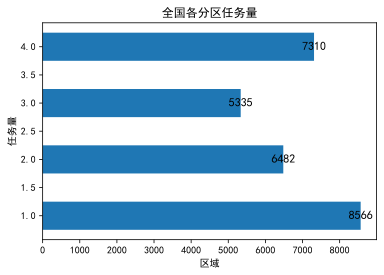

In [34]:
# 绘制全国各分区任务量的条形图
plt.subplot(1, 1, 1)

x = np.array([1, 2, 3, 4])
# x = np.array(['东区', '北区', '南区', '西区'])
y = np.array([8566, 6482, 5335, 7310])

# 绘图
# width：指明条形图的宽度
# align：指明条形图的位置，可以选edge，默认是center
plt.barh(x, height=0.5, width=y, align='center')

plt.title('全国各分区任务量', loc='center')

# 添加数据标签
for a, b in zip(x, y):
    plt.text(b, a, b, ha='center', va='center', fontsize=12)
    
plt.xlabel('区域')
plt.ylabel('任务量')

# plt.xticks(x, ['东区', '南区', '西区', '北区'])

plt.grid(False)

# plt.savefig('./image/plt_barh_save.jpg')

### 6.4 绘制散点图
散点图：发现各变量之间的相关关系，使用plt.scatter方法

plt.scatter(x, y, s, c, marker, linewidths, edgecolors)

<img src='./image/plt_scatter.jpg' width='60%' />

Text(0.5, 1.0, '1-8月平均气温与啤酒销量关系图')

Text(0.5, 0, '平均气温')

Text(0, 0.5, '啤酒销量')

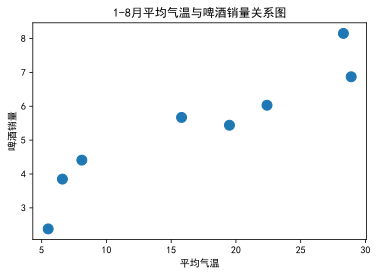

In [35]:
# 绘制1-8月平均气温和啤酒销量关系的散点图
plt.subplot(1, 1, 1)

x = np.array([5.5, 6.6, 8.1, 15.8, 19.5, 22.4, 28.3, 28.9])
y = np.array([2.38, 3.85, 4.41, 5.67, 5.44, 6.03, 8.15, 6.87])

# 绘图
plt.scatter(x, y, marker='o', s=100)

plt.title('1-8月平均气温与啤酒销量关系图', loc='center')

plt.xlabel('平均气温')
plt.ylabel('啤酒销量')

plt.grid(False)

# plt.savefig('./image/plt_scatter_save.jpg')

### 6.5 绘制气泡图
气泡图与散点图类似，散点图各点大小一致，气泡图大小不一致

Text(0.5, 1.0, '1-8月平均气温与啤酒销量关系图')

Text(5.5, 2.38, '2.38')

Text(6.6, 3.85, '3.85')

Text(8.1, 4.41, '4.41')

Text(15.8, 5.67, '5.67')

Text(19.5, 5.44, '5.44')

Text(22.4, 6.03, '6.03')

Text(28.3, 8.15, '8.15')

Text(28.9, 6.87, '6.87')

Text(0.5, 0, '平均气温')

Text(0, 0.5, '啤酒销量')

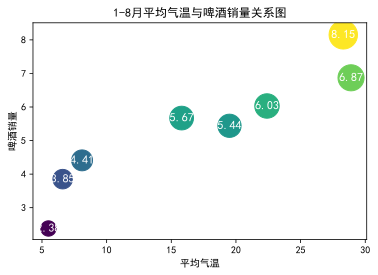

In [36]:
# 绘制1-8月平均气温与啤酒销量关系的气泡图
plt.subplot(1, 1, 1)

x = np.array([5.5, 6.6, 8.1, 15.8, 19.5, 22.4, 28.3, 28.9])
y = np.array([2.38, 3.85, 4.41, 5.67, 5.44, 6.03, 8.15, 6.87])

# 绘图
# 根据y值的大小生成不同的颜色
colors = y*10
# 根据y值的大小生成大小不同的形状
area = y*100
plt.scatter(x, y, marker='o', c=colors, s=area)

plt.title('1-8月平均气温与啤酒销量关系图', loc='center')

# 添加数据标签
for a, b in zip(x, y):
    plt.text(a, b, b, ha='center', va='center', fontsize=12, color='white')

plt.xlabel('平均气温')
plt.ylabel('啤酒销量')

plt.grid(False)

# plt.savefig('./image/plt_scatter_save2.jpg')

### 6.6 绘制面积图
面积图与折线图类似的一种图形

plt.stackplot(x, y, labels, colors)

<img src='./image/plt_stackplot.jpg' width='80%' />

Text(0.5, 0, '月份')

Text(0, 0.5, '注册和激活人数')

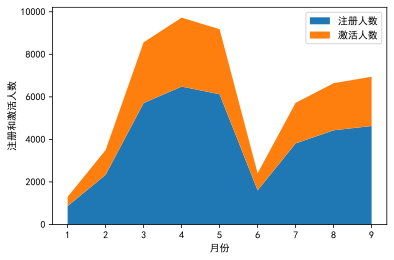

In [37]:
# 绘制xxx公司1-9月注册与激活人数的面积图
# 建立坐标系
plt.subplot(1, 1, 1)

x = np.array([1, 2, 3, 4, 5, 6, 7, 8, 9])
y1 = np.array([866, 2335, 5710, 6482, 6120, 1605, 3813, 4428, 4631])
y2 = np.array([433, 1167, 2855, 3241, 3060, 802, 1906, 2214, 2315])

# 绘图
labels = ['注册人数', '激活人数']
plt.stackplot(x, y1, y2, labels=labels)

plt.xlabel('月份')
plt.ylabel('注册和激活人数')

plt.grid(False)

plt.legend()

# plt.savefig('./image/plt_stackplot_save.jpg')

### 6.7 绘制树地图
树地图：表示同一等级中不同类别的占比关系

squarify库：pip install squarify

squarify.plot(sizes, label, color, value, edgecolor, linewidth)

* sizes：待绘图数据
* label：不同类别的图例标签
* color：不同类别的颜色
* value：不同类别的数据标签
* edgecolor：不同类别之间边框的颜色
* linewidth：边框线宽

Text(0.5, 1.0, '菊粉星座分布')

(0.0, 100.0, 0.0, 100.0)

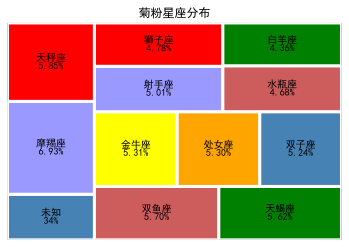

In [41]:
# 绘制菊粉星座分布的树地图
import squarify

# 指定每一块的大小
size = np.array([0.34, 0.693, 0.585, 0.570, 0.562, 0.531, 0.530, 0.524, 0.501, 0.478, 0.468, 0.436])

# 指定每一块的文字标签
xingzuo = np.array(['未知', '摩羯座', '天秤座', '双鱼座', '天蝎座', '金牛座', 
                   '处女座', '双子座', '射手座', '狮子座', '水瓶座', '白羊座'])
# 指定每一块数据标签
rate = np.array(['34%', '6.93%', '5.85%', '5.70%', '5.62%', '5.31%',
                 '5.30%', '5.24%', '5.01%', '4.78%', '4.68%', '4.36%'])
# 指定每一块的颜色
colors = ['steelblue', '#9999ff', 'red', 'indianred', 'green', 'yellow', 'orange']
# 绘图
plot = squarify.plot(sizes=size, label=xingzuo, color=colors, value=rate, edgecolor='white', linewidth=3)

# 设置标题大小
plt.title('菊粉星座分布', fontdict={'fontsize':12})

# 去除坐标轴
plt.axis('off')

# 去除上边框和右边框的刻度
plt.tick_params(top='off', right='off')

# 保存图片
# plt.savefig('./image/squarify_save.jpg')

### 6.8 绘制雷达图
雷达图常用来综合评价某一事物，可以直观地看出该事物的优势与不足

雷达图使用plt.polar方法，用来建立**极坐标系**的

雷达图就是先将各点展示在极坐标系中，然后用线将个点连接起来

plt.polar(theta, r, color, markder, linewidth)

* theta：每一点在极坐标系中的角度
* r：每一点在极坐标系中的半径
* color：连接各点之间线的颜色
* marker：每点的标记物
* linewidth：连接线的宽度

([<matplotlib.projections.polar.ThetaTick at 0x121dcf550>,
 <a list of 5 Text xticklabel objects>)

Text(0.5, 1.05, '某数据分析师的综合评级')

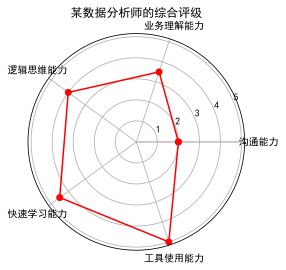

In [44]:
# 绘制某数据分析师的综合评价的雷达图
# 建立坐标系
# 参数polar等于True表示建立一个极坐标系
plt.subplot(111, polar=True)

# 把整个圆均分为5份
dataLenth = 5
# np.linspace表示在指定的间隔内返回均匀间隔的数字
# endpoint：true有stop，false没有stop

# np.linspace(2.0, 3.0, num=5)
# array([2.  , 2.25, 2.5 , 2.75, 3.  ])

# np.linspace(2.0, 3.0, num=5, endpoint=False)
# array([2. ,  2.2,  2.4,  2.6,  2.8])

# np.linspace(2.0, 3.0, num=5, retstep=True)
# (array([2.  ,  2.25,  2.5 ,  2.75,  3.  ]), 0.25)
angles = np.linspace(0, 2*np.pi, dataLenth, endpoint=False)
labels = ['沟通能力', '业务理解能力', '逻辑思维能力', '快速学习能力', '工具使用能力']
data = [2, 3.5, 4, 4.5, 5]

# 闭合
data = np.concatenate((data, [data[0]]))
# 闭合
angles = np.concatenate((angles, [angles[0]]))

# 绘图
plt.polar(angles, data, color='r', marker='o')

# 设置x轴刻度
plt.xticks(angles, labels)

# 设置标题
plt.title('某数据分析师的综合评级')

# plt.savefig('./image/plt_polar_save.jpg')

### 6.9 绘制箱形图
箱形图反应一组数据离散情况，从上到下刻度：上边缘、上四分位数、中位数、下四分位数、下边缘

plt.boxplot(x, vert, widths, labels)

* x：待绘图源数据
* vert：箱形图方向，True表示纵向；False则表示横向；默认为True
* widths：箱形图的宽度
* labels：箱形图的标签

{'whiskers': [<matplotlib.lines.Line2D at 0x1223514d0>,
 'caps': [<matplotlib.lines.Line2D at 0x121c68c10>,
 'boxes': [<matplotlib.lines.Line2D at 0x121c61510>,
 'medians': [<matplotlib.lines.Line2D at 0x121c75690>,
 'fliers': [<matplotlib.lines.Line2D at 0x121c75b90>,
 'means': []}

Text(0.5, 1.0, 'XXX公司1-9月注册和激活人数')

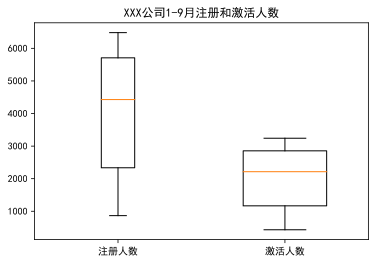

In [45]:
# 绘制xxx公司1-9月注册与激活人数的箱形图
plt.subplot(1, 1, 1)

y1 = np.array([866, 2335, 5710, 6482, 6120, 1605, 3813, 4428, 4631])
y2 = np.array([433, 1167, 2855, 3241, 3060, 802, 1906, 2214, 2315])
x = [y1, y2]

# 绘图
labels = ['注册人数', '激活人数']
plt.boxplot(x, labels=labels, vert=True, widths=[0.2, 0.5])

plt.title('XXX公司1-9月注册和激活人数', loc='center')

plt.grid(False)

# plt.savefig('./image/plt_boxplot_save.jpg')

### 6.10 绘制饼图
饼图：表示同一等级中不同类别的占比情况

plt.pie(x, explode, colors, autopct, pctdistance, shadow,
    
    labeldistance, startangle, radius, counterclock, wedgeprops,
    
    textprops, center, frame)

<img src='./image/plt_pie.jpg' width='60%' />
<img src='./image/plt_pie2.jpg' width='60%' />

([<matplotlib.patches.Wedge at 0x121b3d350>,
 [Text(0.6484262206448334, 0.949759672959564, '东区'),
  Text(-0.9122830706302715, 0.6146052383777765, '北区'),
  Text(-0.7328665981875241, -0.8203088133508298, '南区'),
  Text(0.8157621116127389, -0.7379242354450256, '西区')],
 [Text(0.36650177688621016, 0.5368206847162752, '31%'),
  Text(-0.49760894761651164, 0.3352392209333326, '19%'),
  Text(-0.3997454171931949, -0.4474411709186344, '26%'),
  Text(0.44496115178876666, -0.40250412842455935, '23%')])

Text(0.5, 1.0, '全国各区域任务量占比')

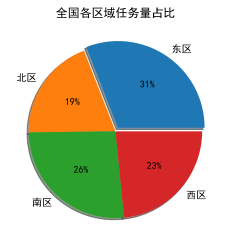

In [46]:
# 绘制全国各区域任务量占比饼图
plt.subplot(1, 1, 1)
x = np.array([8566, 5335, 7310, 6482])

labels = ['东区', '北区', '南区', '西区']
# 让第一块离圆心远点
explode = [0.05, 0, 0, 0]
labeldistance = 1.1
plt.pie(x, labels=labels, autopct='%.0f%%', shadow=True,
       explode=explode, radius=1.0, labeldistance=labeldistance)

plt.title('全国各区域任务量占比', loc='center')

# plt.savefig('./image/plt_pie_save.jpg')

### 6.11 绘制圆环图
圆环图类似于饼图，表示同一层级下不同类别之间的占比关系，也是plt.pie，参数和饼图完全一致

([<matplotlib.patches.Wedge at 0x121fa4a90>,
 [Text(0.620233776268971, 0.9084657741352351, '东区'),
  Text(-0.9122830706302715, 0.6146052383777765, '北区'),
  Text(-0.7328665981875241, -0.8203088133508298, '南区'),
  Text(0.8157621116127389, -0.7379242354450256, '西区')])

([<matplotlib.patches.Wedge at 0x121fd24d0>,
 [Text(0.4341413157357941, 0.6359412850029423, '东区'),
  Text(-0.6385889452129693, 0.430237328752152, '北区'),
  Text(-0.5130543576122121, -0.5741735157033284, '南区'),
  Text(0.5710196703977041, -0.5165622286026121, '西区')])

Text(0.7, 0.45, '完成量')

Text(1.1, 0.2, '任务量')

Text(0.5, 1.0, '全国各区域任务量和完成量的占比')

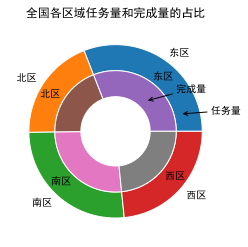

In [47]:
# 调整wedgeprops参数实现圆环图
# 绘制全国各区域任务量占比饼图
plt.subplot(1, 1, 1)
x1 = np.array([8566, 5335, 7310, 6482])
x2 = np.array([4283, 2667, 3655, 3241])

labels = ['东区', '北区', '南区', '西区']
plt.pie(x1, labels=labels, radius=1.0, wedgeprops=dict(width=0.3, edgecolor='w'))
plt.pie(x2, labels=labels, radius=0.7, wedgeprops=dict(width=0.3, edgecolor='w'))

# 添加注释
plt.annotate('完成量', xy=(0.35, 0.35), xytext=(0.7, 0.45), arrowprops=dict(facecolor='black', arrowstyle='->'))
plt.annotate('任务量', xy=(0.75, 0.20), xytext=(1.1, 0.2), arrowprops=dict(facecolor='black', arrowstyle='->'))

plt.title('全国各区域任务量和完成量的占比', loc='center')

# plt.savefig('./image/plt_pie_save2.jpg')

### 6.12 绘制热力图
热力图是将某一事物的响应反映在图表上，可以快速发现需重点关注的区域

plt.imshow(x, cmap)

* x：表示待绘图的数据，需要是矩阵形式
* cmap：配色方案，用来表明图标渐变的主题色，所有的可选值在plt.cm里面，在Jupyter Notebook中输入plt.cm.，按Tab键就可以看到

([<matplotlib.axis.XTick at 0x121c39450>,
 <a list of 4 Text xticklabel objects>)

([<matplotlib.axis.YTick at 0x123563b90>,
 <a list of 4 Text yticklabel objects>)

Text(0, 0, '1.0')

Text(1, 0, '0.082')

Text(2, 0, '0.031')

Text(3, 0, '-0.0086')

Text(0, 1, '0.082')

Text(1, 1, '1.0')

Text(2, 1, '-0.063')

Text(3, 1, '0.062')

Text(0, 2, '0.031')

Text(1, 2, '-0.09')

Text(2, 2, '1.0')

Text(3, 2, '0.026')

Text(0, 3, '-0.0086')

Text(1, 3, '0.062')

Text(2, 3, '0.026')

Text(3, 3, '1.0')

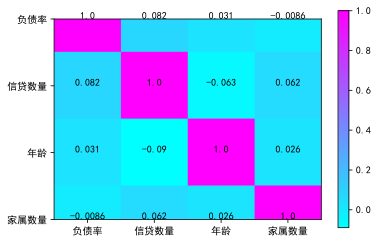

In [54]:
import itertools
# 几个相关指标之间的关联性
cm = np.array([[1, 0.082, 0.031, -0.0086],
             [0.082, 1, -0.063, 0.062],
             [0.031, -0.09, 1, 0.026],
             [-0.0086, 0.062, 0.026, 1]])
# 设置配色方案
cmap = plt.cm.cool
plt.imshow(cm, cmap=cmap)
# 显示右边的颜色条
plt.colorbar()

# 设置x轴和y轴的刻度标签
classes = ['负债率', '信贷数量', '年龄', '家属数量']
tick_marks = np.arange(len(classes))
plt.xticks(tick_marks, classes)
plt.yticks(tick_marks, classes)

# 将数值显示在指定位置
for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
    plt.text(j, i, cm[i, j], horizontalalignment='center')
    
plt.grid(False)

# plt.savefig('./image/plt_imshow_save.jpg')

### 6.13 绘制水平线和垂直线
水平线和垂直线主要用来做对比参考，plt库中的axhline和axvline方法

plt.axhline(y, xmin, xmax)
plt.axvline(x, ymin, ymax)

* y/x：画水平/垂直线时的横/纵坐标
* xmin/xmax：水平线的起点和终点
* ymin/ymax：垂直线的启动和终点

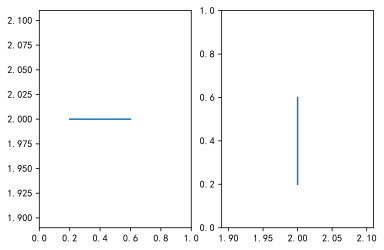

In [56]:
plt.subplot(1, 2, 1)
# 绘制一条y等于2，起点是0.2，终点是0.6的水平线
plt.axhline(y=2, xmin=0.2, xmax=0.6)

plt.subplot(1, 2, 2)
# 绘制一条x等于2，起点是0.2，终点是0.6的水平线
plt.axvline(x=2, ymin=0.2, ymax=0.6)